In [59]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
train = pd.read_csv('/Users/ryan/Downloads/spaceship-titanic/train.csv')
test = pd.read_csv('/Users/ryan/Downloads/spaceship-titanic/test.csv')
submit = pd.read_csv('/Users/ryan/Downloads/spaceship-titanic/sample_submission.csv')

In [61]:
train.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [62]:
test.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [63]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [64]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [65]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [66]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [67]:
test.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


In [68]:
data = pd.concat([train, test])
data.reset_index(inplace=True, drop=True)
data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN
12966,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN
12967,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN
12968,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN


In [69]:
x = train.drop('Transported', axis=1)
y = train['Transported']

x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [70]:
spend_cols = [
    'RoomService',
    'FoodCourt',
    'ShoppingMall',
    'Spa',
    'VRDeck'
]

x_train[spend_cols] = x_train[spend_cols].fillna(0)
x_test[spend_cols] = x_test[spend_cols].fillna(0)

x_train['TotalSpend'] = x_train[spend_cols].sum(axis=1)
x_test['TotalSpend'] = x_test[spend_cols].sum(axis=1)
x_train


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,TotalSpend
3600,3868_04,Earth,False,G/630/S,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Harrie Braymon,0.0
1262,1336_01,Earth,True,G/201/S,TRAPPIST-1e,17.0,False,0.0,0.0,0.0,0.0,0.0,NaN,0.0
8612,9193_01,Earth,NaN,G/1483/S,PSO J318.5-22,35.0,False,0.0,0.0,0.0,0.0,0.0,Camily Howence,0.0
5075,5422_01,Europa,True,D/164/S,55 Cancri e,26.0,False,0.0,0.0,0.0,0.0,0.0,Pleion Sperap,0.0
4758,5076_01,Earth,False,G/818/P,TRAPPIST-1e,13.0,False,0.0,0.0,60.0,1.0,5147.0,Alicey Wolferguson,5208.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4087,4362_01,Europa,False,B/168/S,TRAPPIST-1e,43.0,False,0.0,1947.0,0.0,0.0,1651.0,Altar Freednal,3598.0
4406,4678_01,Earth,False,F/951/P,TRAPPIST-1e,38.0,False,183.0,203.0,0.0,110.0,374.0,Sonnie Mcleaney,870.0
7111,7579_01,Earth,False,G/1229/S,PSO J318.5-22,45.0,False,1.0,7.0,56.0,613.0,0.0,Willy Curton,677.0
426,0460_01,Earth,True,G/65/S,PSO J318.5-22,24.0,False,0.0,0.0,0.0,0.0,0.0,Shawne Jenningley,0.0


In [71]:
x_train.loc[data['CryoSleep'] == True, spend_cols] = 0
x_test.loc[data['CryoSleep'] == True, spend_cols] = 0

x_train.loc[
    (x_train['CryoSleep'].isna()) & (x_train['TotalSpend'] == 0),
    'CryoSleep'
] = True

x_test.loc[
    (x_test['CryoSleep'].isna()) & (x_test['TotalSpend'] == 0),
    'CryoSleep'
] = True


In [72]:
mask = (x_train['CryoSleep'] == True) & (x_train['VIP'] == True)
x_train[mask]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,TotalSpend
2675,2866_01,Europa,True,C/110/S,TRAPPIST-1e,36.0,True,0.0,0.0,0.0,0.0,0.0,Hadirk Wheededly,0.0
4155,4441_01,Europa,True,B/144/P,55 Cancri e,31.0,True,0.0,0.0,0.0,0.0,0.0,Kabiton Clinarfork,0.0
1849,1976_03,Europa,True,B/82/S,55 Cancri e,26.0,True,0.0,0.0,0.0,0.0,0.0,Cellah Lansuffle,0.0
6343,6708_06,Europa,True,A/67/P,55 Cancri e,41.0,True,0.0,0.0,0.0,0.0,0.0,Shamak Sysilstict,0.0
4503,4786_01,Europa,True,B/160/P,TRAPPIST-1e,46.0,True,0.0,0.0,0.0,0.0,0.0,Enibah Dratembid,0.0
6965,7396_02,Europa,True,C/271/S,TRAPPIST-1e,31.0,True,0.0,0.0,0.0,0.0,0.0,Muontak Ingent,0.0
7572,8092_02,Europa,True,D/238/S,55 Cancri e,33.0,True,0.0,0.0,0.0,0.0,0.0,Hekabih Pulgaly,0.0
8103,8656_03,Europa,True,A/103/S,55 Cancri e,29.0,True,0.0,0.0,0.0,0.0,0.0,Eltares Imparmle,0.0
4071,4348_01,Europa,True,B/142/P,TRAPPIST-1e,47.0,True,0.0,0.0,0.0,0.0,0.0,Krazet Conate,0.0
5220,5568_02,Europa,True,B/188/P,55 Cancri e,29.0,True,0.0,0.0,0.0,0.0,0.0,Merabik Covetive,0.0


In [73]:
x_train.isnull().sum()

PassengerId       0
HomePlanet      169
CryoSleep        86
Cabin           161
Destination     153
Age             139
VIP             158
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            159
TotalSpend        0
dtype: int64

<Axes: xlabel='Transported', ylabel='count'>

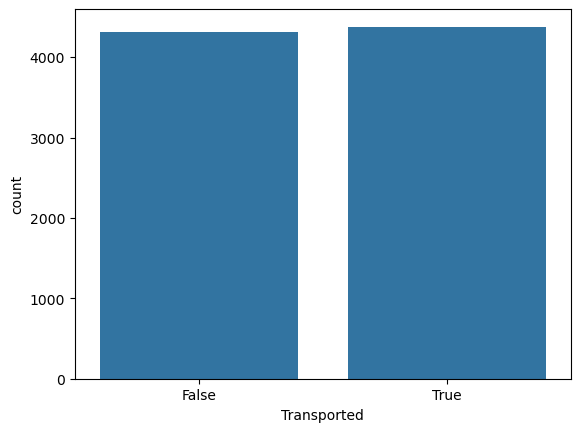

In [74]:
sns.countplot(x='Transported', data=train)

<Axes: xlabel='HomePlanet', ylabel='count'>

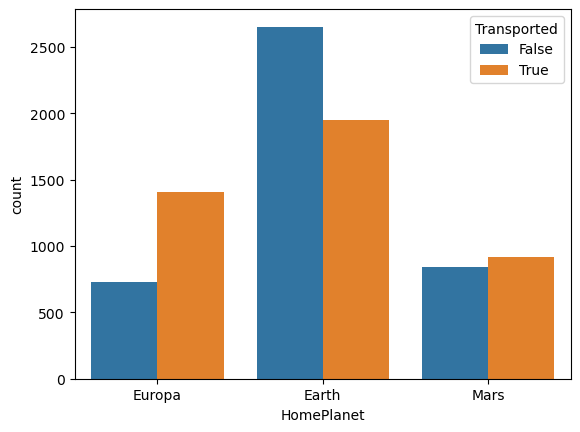

In [75]:
sns.countplot(x='HomePlanet', hue='Transported', data=train)

<Axes: xlabel='CryoSleep', ylabel='count'>

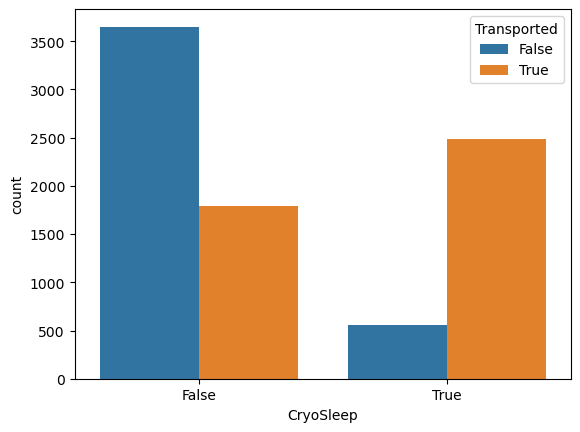

In [76]:
sns.countplot(x='CryoSleep', hue='Transported', data=train)

<Axes: xlabel='Destination', ylabel='count'>

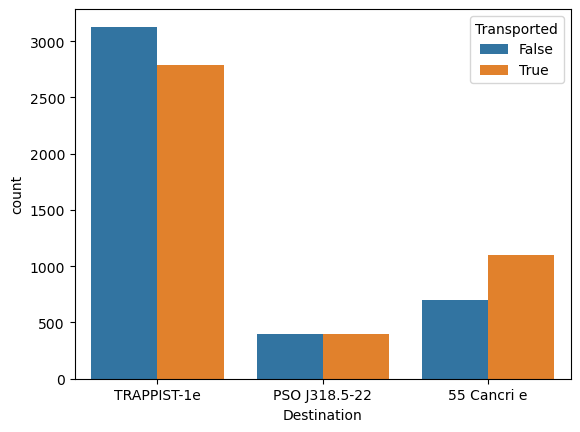

In [77]:
sns.countplot(x='Destination', hue='Transported', data=train)

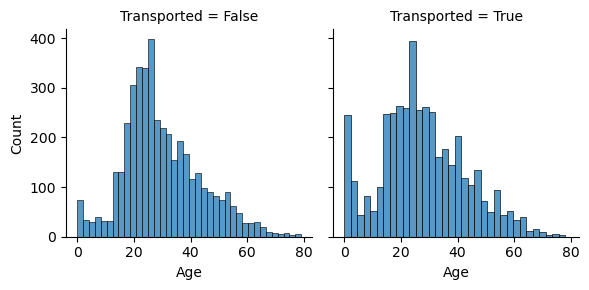

In [78]:
g = sns.FacetGrid(data.dropna(subset=['Transported', 'Age']), col='Transported') 
g.map(sns.histplot, 'Age', kde=False)

<Axes: xlabel='VIP', ylabel='count'>

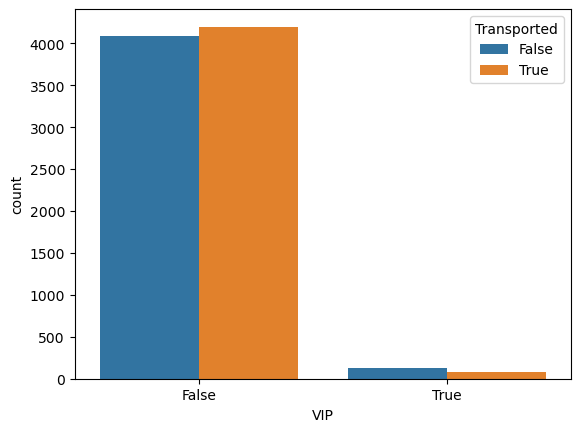

In [79]:
sns.countplot(x='VIP', hue='Transported', data=train)

In [80]:
def split_cabin(df):
    df = df.copy()

    # 先確保是字串
    df['Cabin'] = df['Cabin'].astype(str)

    # 不符合 A/B/C 格式的，全部當 Unknown
    df.loc[~df['Cabin'].str.contains('/', regex=False), 'Cabin'] = 'Unknown/0/U'

    cabin_split = df['Cabin'].str.split('/', expand=True)

    df['Cabin_Deck'] = cabin_split[0]
    df['Cabin_Num']  = pd.to_numeric(cabin_split[1], errors='coerce').fillna(0).astype(int)
    df['Cabin_Side'] = cabin_split[2]

    return df

In [81]:
x_train = split_cabin(x_train)
x_test  = split_cabin(x_test)

In [82]:
categorical_cols = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Cabin_Deck', 'Cabin_Side']
numerical_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Cabin_Num']

In [83]:
modes = x_train[categorical_cols].mode().iloc[0]

x_train[categorical_cols] = x_train[categorical_cols].fillna(modes)
x_test[categorical_cols]   = x_test[categorical_cols].fillna(modes)

/var/folders/3_/49tdqzgn4c7fz69skjrsqpg00000gp/T/ipykernel_47273/1741236896.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x_train[categorical_cols] = x_train[categorical_cols].fillna(modes)
/var/folders/3_/49tdqzgn4c7fz69skjrsqpg00000gp/T/ipykernel_47273/1741236896.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x_test[categorical_cols]   = x_test[categorical_cols].fillna(modes)


In [84]:
mediams = x_train[numerical_cols].median()

x_train[numerical_cols] = x_train[numerical_cols].fillna(mediams)
x_test[numerical_cols]   = x_test[numerical_cols].fillna(mediams)

In [85]:
x_train = x_train.drop(columns=['Name'])
x_test = x_test.drop(columns=['Name'])
x_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,TotalSpend,Cabin_Deck,Cabin_Num,Cabin_Side
3600,3868_04,Earth,False,G/630/S,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,0.0,G,630,S
1262,1336_01,Earth,True,G/201/S,TRAPPIST-1e,17.0,False,0.0,0.0,0.0,0.0,0.0,0.0,G,201,S
8612,9193_01,Earth,True,G/1483/S,PSO J318.5-22,35.0,False,0.0,0.0,0.0,0.0,0.0,0.0,G,1483,S
5075,5422_01,Europa,True,D/164/S,55 Cancri e,26.0,False,0.0,0.0,0.0,0.0,0.0,0.0,D,164,S
4758,5076_01,Earth,False,G/818/P,TRAPPIST-1e,13.0,False,0.0,0.0,60.0,1.0,5147.0,5208.0,G,818,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4087,4362_01,Europa,False,B/168/S,TRAPPIST-1e,43.0,False,0.0,1947.0,0.0,0.0,1651.0,3598.0,B,168,S
4406,4678_01,Earth,False,F/951/P,TRAPPIST-1e,38.0,False,183.0,203.0,0.0,110.0,374.0,870.0,F,951,P
7111,7579_01,Earth,False,G/1229/S,PSO J318.5-22,45.0,False,1.0,7.0,56.0,613.0,0.0,677.0,G,1229,S
426,0460_01,Earth,True,G/65/S,PSO J318.5-22,24.0,False,0.0,0.0,0.0,0.0,0.0,0.0,G,65,S


In [86]:
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

encoder.fit(x_train[categorical_cols])
x_train[categorical_cols] = encoder.transform(x_train[categorical_cols])
x_test[categorical_cols]   = encoder.transform(x_test[categorical_cols])

x_train = x_train[categorical_cols + numerical_cols]
x_test = x_test[categorical_cols + numerical_cols]
x_train

,HomePlanet,CryoSleep,Destination,VIP,Cabin_Deck,Cabin_Side,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_Num
3600,0.0,0.0,2.0,0.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,630
1262,0.0,1.0,2.0,0.0,6.0,1.0,17.0,0.0,0.0,0.0,0.0,0.0,201
8612,0.0,1.0,1.0,0.0,6.0,1.0,35.0,0.0,0.0,0.0,0.0,0.0,1483
5075,1.0,1.0,0.0,0.0,3.0,1.0,26.0,0.0,0.0,0.0,0.0,0.0,164
4758,0.0,0.0,2.0,0.0,6.0,0.0,13.0,0.0,0.0,60.0,1.0,5147.0,818
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4087,1.0,0.0,2.0,0.0,1.0,1.0,43.0,0.0,1947.0,0.0,0.0,1651.0,168
4406,0.0,0.0,2.0,0.0,5.0,0.0,38.0,183.0,203.0,0.0,110.0,374.0,951
7111,0.0,0.0,1.0,0.0,6.0,1.0,45.0,1.0,7.0,56.0,613.0,0.0,1229
426,0.0,1.0,1.0,0.0,6.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,65


In [87]:
model = RandomForestClassifier(
    n_estimators=500,
    random_state=42
)

model.fit(x_train, y_train)

,n_estimators,500
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [88]:
y_pred = model.predict(x_test)
val_accuracy = accuracy_score(y_test, y_pred)
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy*100:.2f}%")

Validation Accuracy: 0.8091
Validation Accuracy: 80.91%


In [89]:
# 用所有有 label 的資料
X_full = x.copy()
y_full = y.copy()

X_full = split_cabin(X_full)

categorical_cols = [
    'HomePlanet', 'CryoSleep', 'Destination', 'VIP',
    'Cabin_Deck', 'Cabin_Side'
]

numerical_cols = [
    'Age', 'RoomService', 'FoodCourt', 'ShoppingMall',
    'Spa', 'VRDeck', 'Cabin_Num'
]

# 對 X_full 做「同樣的前處理」
X_full[spend_cols] = X_full[spend_cols].fillna(0)
X_full['TotalSpend'] = X_full[spend_cols].sum(axis=1)
X_full.loc[X_full['CryoSleep'] == True, spend_cols] = 0
X_full.loc[
    (X_full['CryoSleep'].isna()) & (X_full['TotalSpend'] == 0),
    'CryoSleep'
] = True

modes = X_full[categorical_cols].mode().iloc[0]

X_full[categorical_cols] = X_full[categorical_cols].fillna(modes)

medians = X_full[numerical_cols].median()
X_full[numerical_cols] = X_full[numerical_cols].fillna(medians)

X_full[numerical_cols] = X_full[numerical_cols].fillna(mediams)

encoder.fit(X_full[categorical_cols])

X_full[categorical_cols] = encoder.fit_transform(X_full[categorical_cols])

X_full = X_full[categorical_cols + numerical_cols]

# 重新訓練模型
model.fit(X_full, y_full)

/var/folders/3_/49tdqzgn4c7fz69skjrsqpg00000gp/T/ipykernel_47273/2444318297.py:28: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_full[categorical_cols] = X_full[categorical_cols].fillna(modes)


,n_estimators,500
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [90]:
passenger_ids = test['PassengerId']
# 拆 Cabin
test = split_cabin(test)

# 補缺失值
test[spend_cols] = test[spend_cols].fillna(0)
test['TotalSpend'] = test[spend_cols].sum(axis=1)
test.loc[test['CryoSleep'] == True, spend_cols] = 0
test.loc[
    (test['CryoSleep'].isna()) & (test['TotalSpend'] == 0),
    'CryoSleep'
] = True

# 類別欄位補值
modes = X_full[categorical_cols].mode().iloc[0]
test[categorical_cols] = test[categorical_cols].fillna(modes)

# 數值欄位補值
medians = X_full[numerical_cols].median()
test[numerical_cols] = test[numerical_cols].fillna(medians)

# 編碼
test[categorical_cols] = encoder.transform(test[categorical_cols])

# 選好特徵順序
X_submit = test[categorical_cols + numerical_cols]

In [91]:
# 預測
submit_pred = model.predict(X_submit)

# 組 submission
submission = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Transported': submit_pred
})

# 輸出 CSV
submission.to_csv('Spaceship_Titanic_submission.csv', index=False)